<a href="https://colab.research.google.com/github/rohandawar/deeplearning_titanic/blob/main/Learning_Tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Tensorflow
Example #1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [5]:
#fetching the data
dftrain_raw = pd.read_csv('https://raw.githubusercontent.com/rohandawar/eat_tensorflow2_in_30_days/master/data/titanic/train.csv')
dftest_raw = pd.read_csv('https://raw.githubusercontent.com/rohandawar/eat_tensorflow2_in_30_days/master/data/titanic/test.csv')

In [7]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [8]:
dftest_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
1,405,0,3,"Oreskovic, Miss. Marija",female,20.00,0,0,315096,8.6625,NaN,S
2,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S
3,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
4,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C


Introduction of each field：

* Survived: 0 for death and 1 for survived [y labels]
* Pclass: Class of the tickets, with three possible values (1,2,3)[converting to one-hot encoding]
* Name: Name of each passenger [discarded]
* Sex: Gender of each passenger [converting to bool type]
* Age: Age of each passenger (partly missing) [numerical feature, should add "Whether age is missing" as auxiliary feature]
* SibSp: Number of siblings and spouse of each passenger (interger) [numerical feature]
* Parch: Number of parents/children of each passenger (interger) [numerical feature]
* Ticket: Ticket number (string) [discarded]
* Fare: Ticket price of each passenger (float, between 0 to 500) [numerical feature]
* Cabin: Cabin where each passenger is located (partly missing) [should add "Whether cabin is missing" as auxiliary feature]
* Embarked: Which port was each passenger embarked, possible values are S、C、Q (partly missing) [converting to one-hot encoding, four dimensions, S,C,Q,nan]

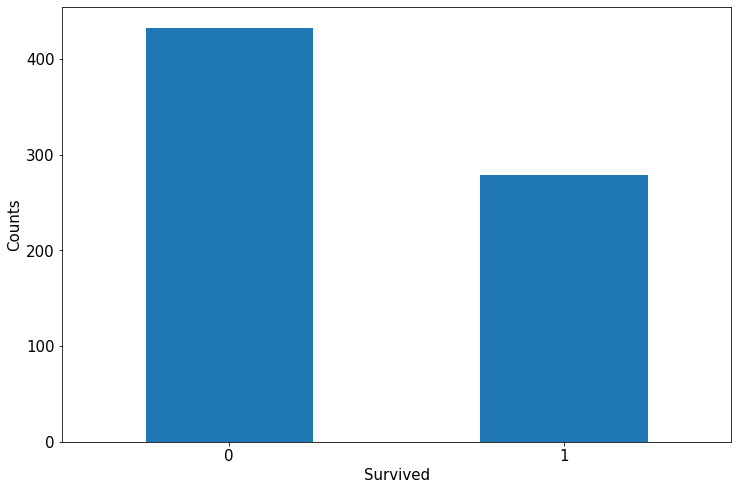

In [14]:
#checking the distribution for the target variable
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar', 
                                                 figsize = (12,8), 
                                                 fontsize = 15, 
                                                 rot =0)
ax.set_ylabel('Counts', fontsize = 15)
ax.set_xlabel('Survived', fontsize = 15)
plt.show()

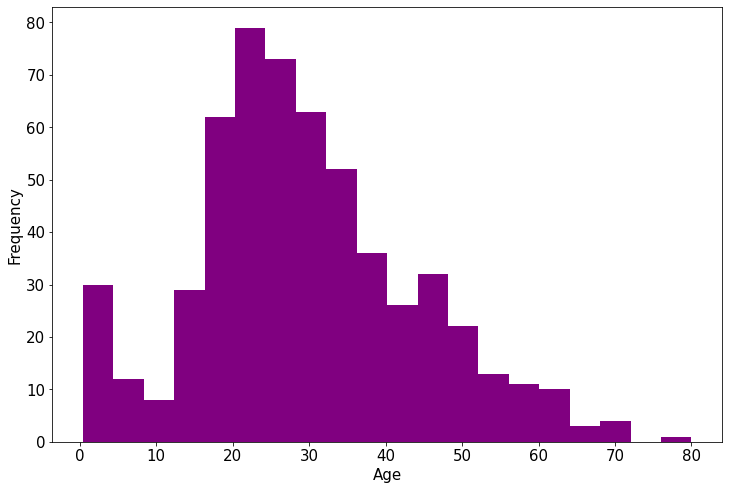

In [21]:
#Age Distribution
ax = dftrain_raw['Age'].plot(kind = 'hist',
                             bins = 20,
                             color = 'purple',
                             figsize = (12,8),
                           fontsize =15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()

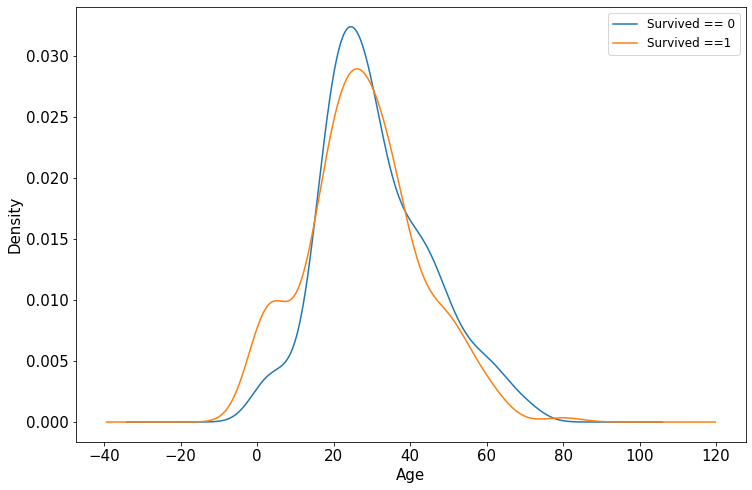

In [25]:
#Co-relation between age & survival (find out why the age is negative)
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                                                    figsize = (12,8),
                                                    fontsize = 15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                                               figsize = (12,8),
                                               fontsize = 15)
ax.legend(['Survived == 0', 'Survived ==1'], fontsize = 12)
ax.set_ylabel('Density', fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()

In [35]:
# data preprocessing

def preprocessing(dfdata):

  dfresult = pd.DataFrame()

  #Pclass
  dfPclass = pd.get_dummies(dfdata['Pclass'])
  dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns]
  dfresult = pd.concat([dfresult,dfPclass], axis = 1)

  #Sex
  dfSex = pd.get_dummies(dfdata['Sex'])
  dfresult = pd.concat([dfresult, dfSex], axis = 1)

  #Age
  dfresult["Age"] = dfdata['Age'].fillna(0) # imputing '0' to the age, not a very good Idea :)
  dfresult['Age_null'] = pd.isna(dfdata['Age'].astype('int32'))

  #SibSp,Parch,Fare
  dfresult['SibSp'] = dfdata['SibSp']
  dfresult['Parch'] = dfdata['Parch']
  dfresult['Fare'] = dfdata['Fare']

  #Carbin
  dfresult['Cabin_null'] = pd.isna(dfdata['Cabin'].astype('int32'))

  #Embarked
  dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na=True)
  dfEmbarked.columns = ['Embarked_'+str(x) for x in dfEmbarked.columns]
  dfresult = pd.concat([dfresult, dfEmbarked], axis = 1)

  return(dfresult)

In [33]:
dftrain_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            146
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          544
Embarked         2
dtype: int64

In [34]:
dftrain_raw.dropna(how = 'any', inplace = True)
dftrain_raw.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [36]:
x_train = preprocessing(dftrain_raw)

ValueError: ignored